In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [175]:
# 평균 매매가격
data = pd.read_excel('./data/price/평균매매가격_아파트.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)
data = data.iloc[[0],:].drop('지 역', axis=1).T
sale_data = data.iloc[84:114].astype('int64')
sale_data.columns = ['매매가']
sale_data

,매매가
2019년 01월,349426
2019년 02월,348312
2019년 03월,347165
2019년 04월,345809
2019년 05월,344891
2019년 06월,344322
2019년 07월,344195
2019년 08월,344332
2019년 09월,344798
2019년 10월,346156


In [166]:
# 평균 전세가격
data = pd.read_excel('./data/price/평균전세가격_아파트.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)
data = data.iloc[[0],:].drop('지 역', axis=1).T
lease_data = data.iloc[84:114].astype('int64')
lease_data.columns = ['전세가']

In [167]:
data = pd.read_excel('./data/price/매매가격대비전세가격_평균가격_아파트.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)
data = data.iloc[[0],:].drop('지 역', axis=1).T
per_data = data.iloc[84:114].astype('int64')

In [168]:
per_data.columns = ['전세가율']
per_data

,전세가율
2019년 01월,71
2019년 02월,71
2019년 03월,71
2019년 04월,71
2019년 05월,71
2019년 06월,71
2019년 07월,71
2019년 08월,71
2019년 09월,71
2019년 10월,71


In [179]:
data = pd.read_csv('./data/전세보증금반환보증 수정.csv', encoding = 'CP949')
accident_data = data.set_index('Unnamed: 0')['건수']
accident_data = pd.DataFrame(accident_data)
accident_data

,건수
Unnamed: 0,
2019년 01월,5747
2019년 02월,7657
2019년 03월,8235
2019년 04월,8608
2019년 05월,8103
2019년 06월,7153
2019년 07월,8564
2019년 08월,9303
2019년 09월,8417


In [190]:
df = pd.concat([accident_data, sale_data, lease_data, per_data], join='inner', axis=1)
df

,건수,매매가,전세가,전세가율
2019년 01월,5747,349426,228000,71
2019년 02월,7657,348312,226979,71
2019년 03월,8235,347165,225977,71
2019년 04월,8608,345809,224927,71
2019년 05월,8103,344891,224244,71
2019년 06월,7153,344322,223702,71
2019년 07월,8564,344195,223366,71
2019년 08월,9303,344332,223347,71
2019년 09월,8417,344798,223550,71
2019년 10월,9031,346156,224180,71


In [191]:
df.corr()

,건수,매매가,전세가,전세가율
건수,1.000000,0.789374,0.803300,-0.678464
매매가,0.789374,1.000000,0.986884,-0.904361
전세가,0.803300,0.986884,1.000000,-0.849332
전세가율,-0.678464,-0.904361,-0.849332,1.000000


C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


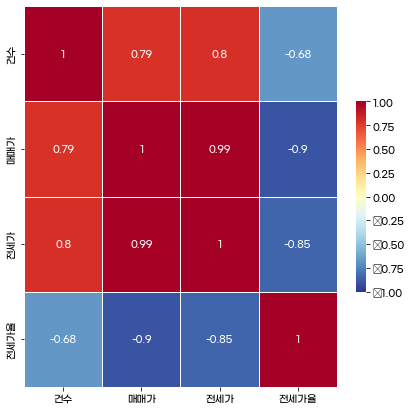

In [192]:
fig, ax = plt.subplots( figsize=(7,7) )

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()